In [2]:
import cv2
import numpy as np
from superpoint.datasets.synthetic_shapes import SyntheticShapes
from utils import plot_imgs

%load_ext autoreload
%autoreload 2
%matplotlib inline

2021-11-25 09:03:40.057955: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [3]:
config = {
    'primitives': 'all',
    'on-the-fly': True,
    'preprocessing': {'resize': [120, 160], 'blur_size': 21}
}
dataset = SyntheticShapes(**config)
data = dataset.get_test_set()

2021-11-25 09:03:45.277677: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-11-25 09:03:45.358768: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1082] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-25 09:03:45.360472: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1666] Found device 0 with properties: 
name: NVIDIA GeForce RTX 3080 major: 8 minor: 6 memoryClockRate(GHz): 1.785
pciBusID: 0000:01:00.0
2021-11-25 09:03:45.360541: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-11-25 09:03:45.376679: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-11-25 09:03:45.384663: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library lib

In [4]:
def draw_keypoints(img, corners, color):
    keypoints = [cv2.KeyPoint(float(c[1]), float(c[0]), 1) for c in np.stack(corners).T]
    return cv2.drawKeypoints(img.astype(np.uint8), keypoints, None, color=color)
def display(d):
    return draw_keypoints(d['image'][..., 0] * 255, np.where(d['keypoint_map']), (0, 255, 0))

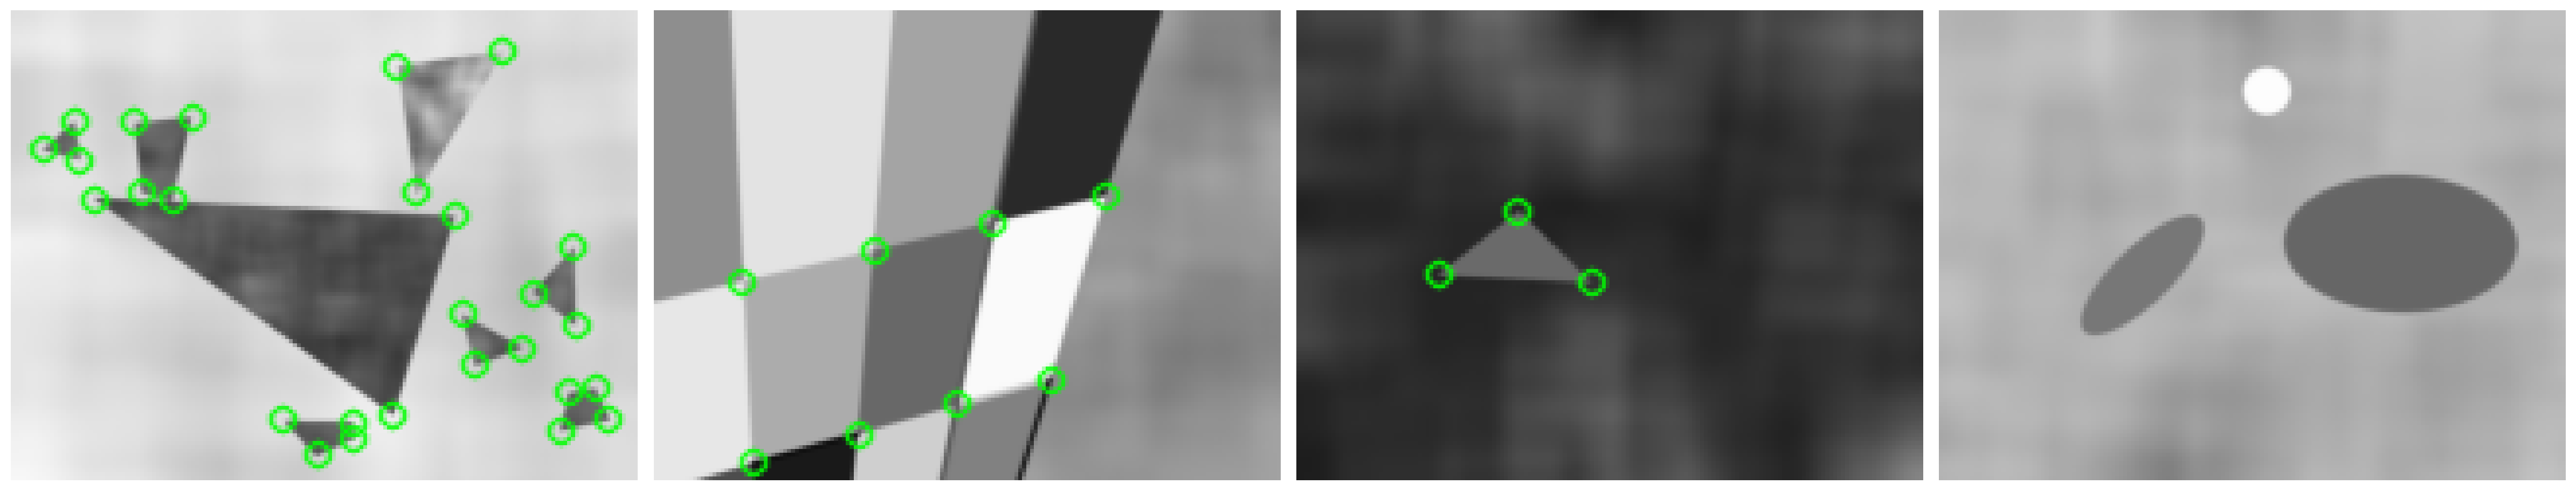

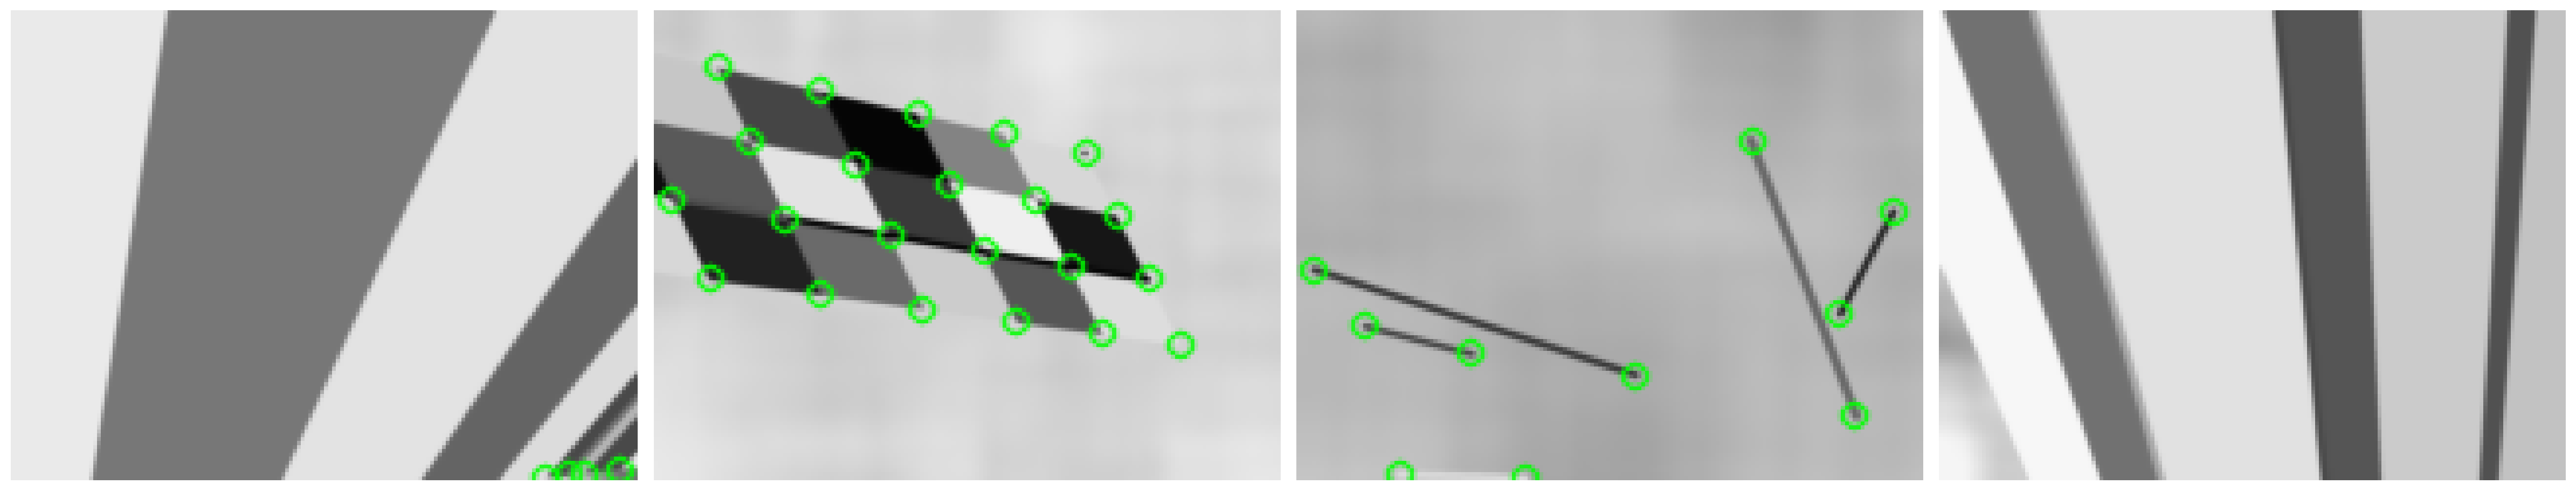

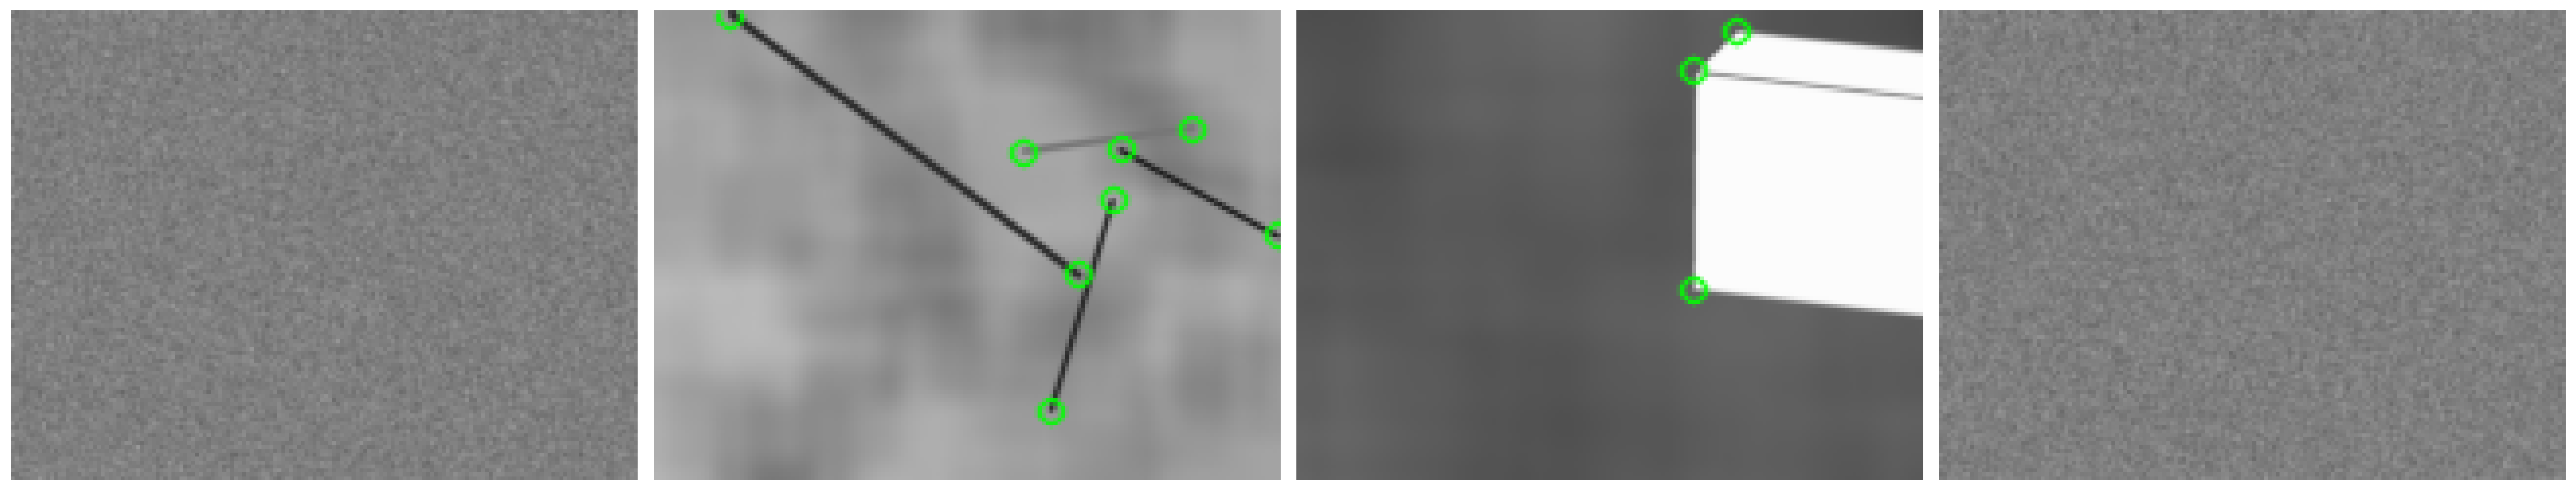

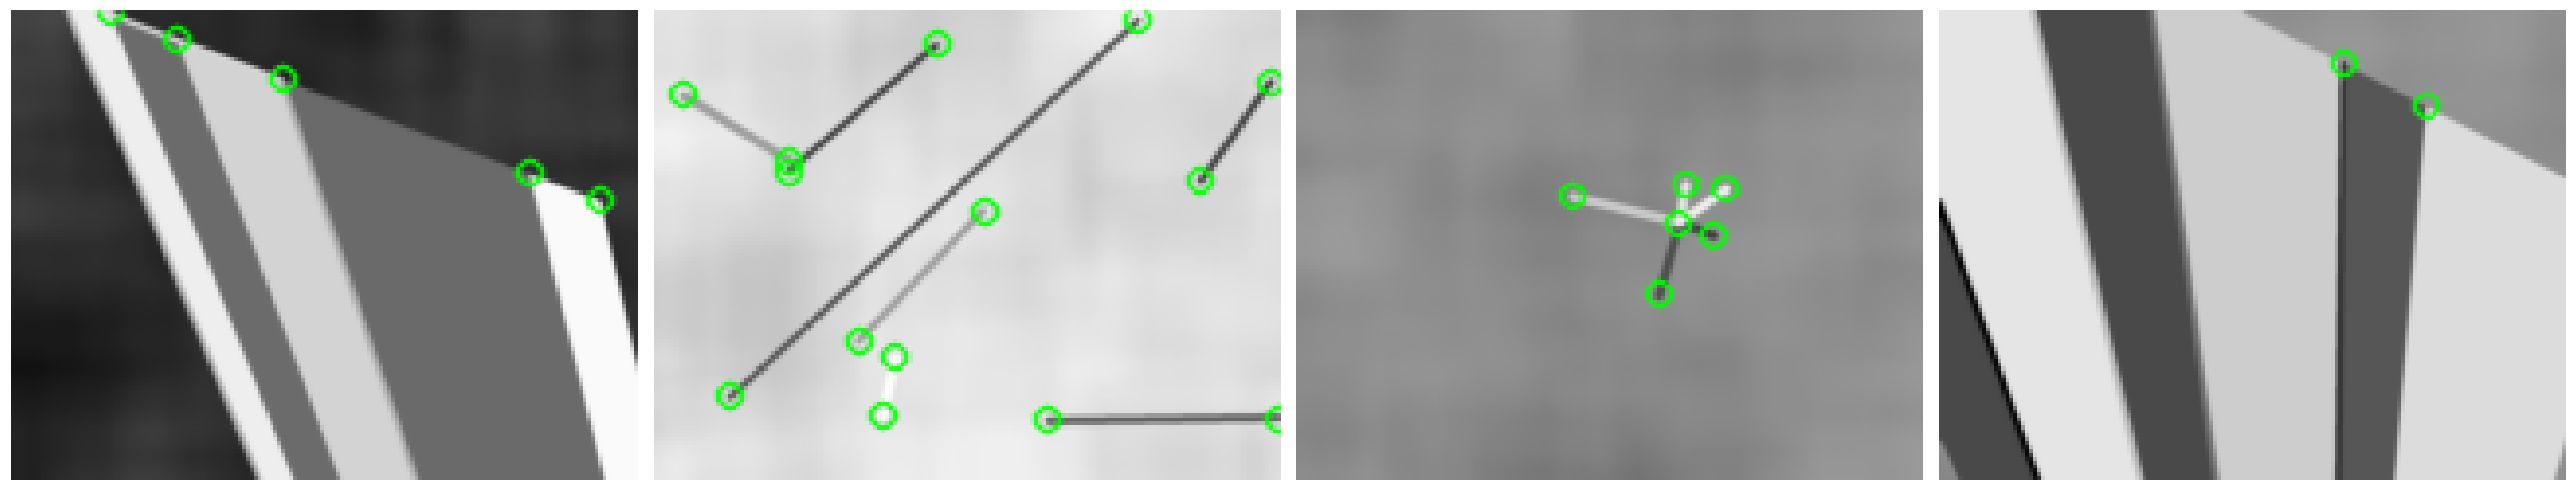

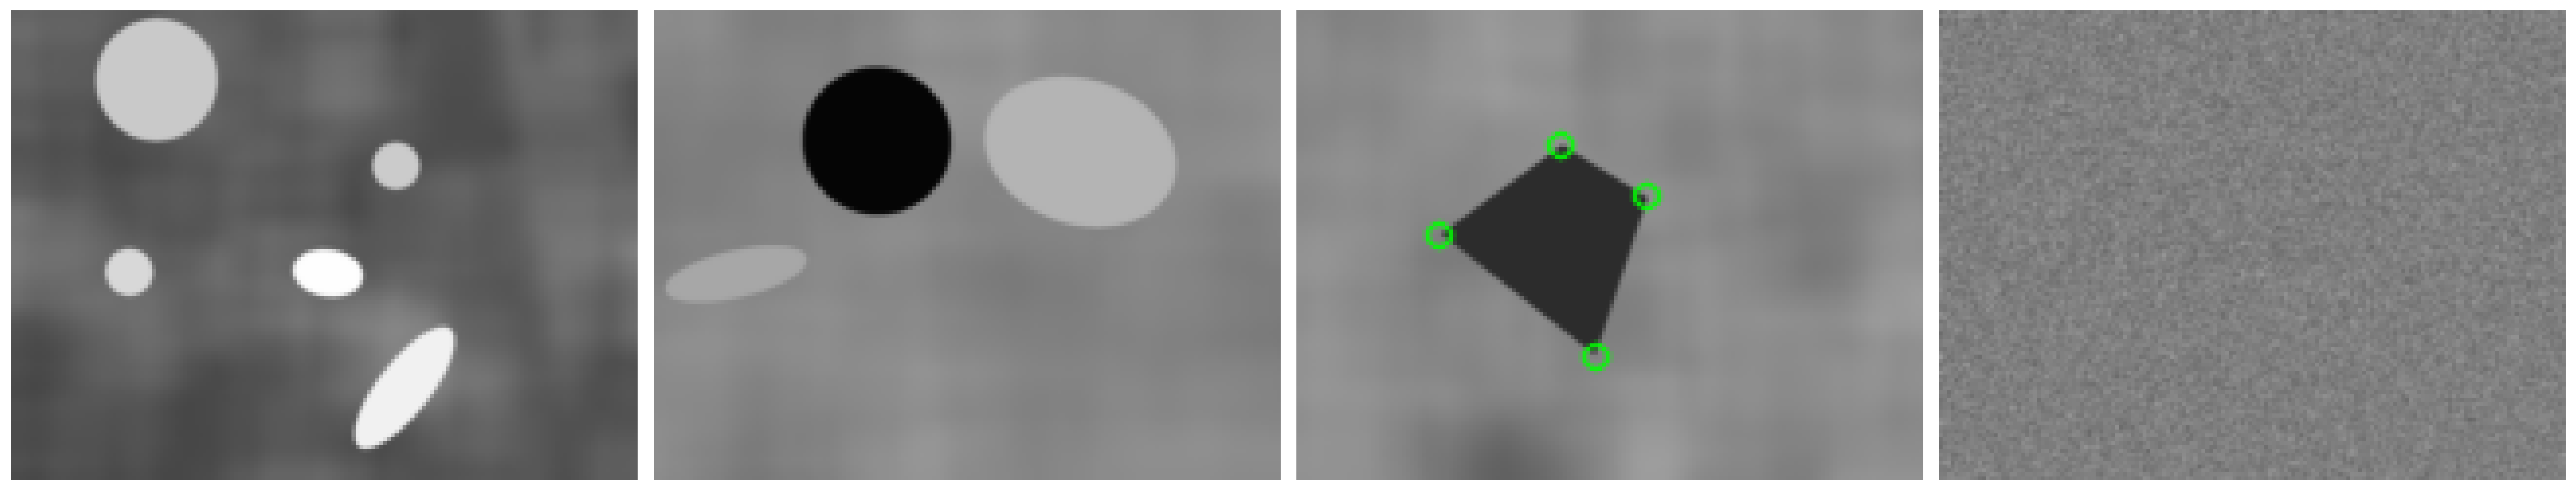

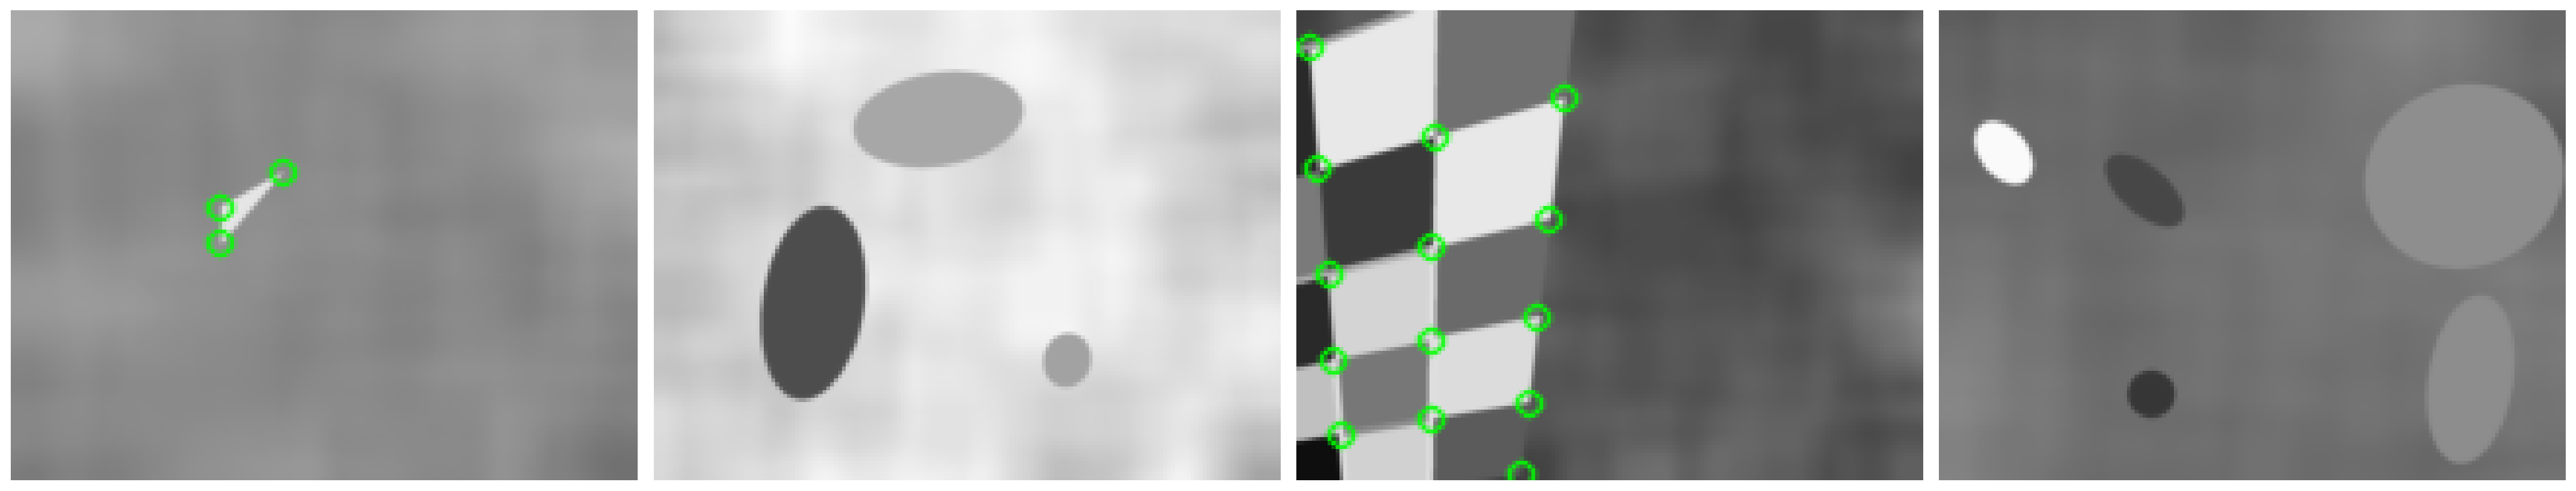

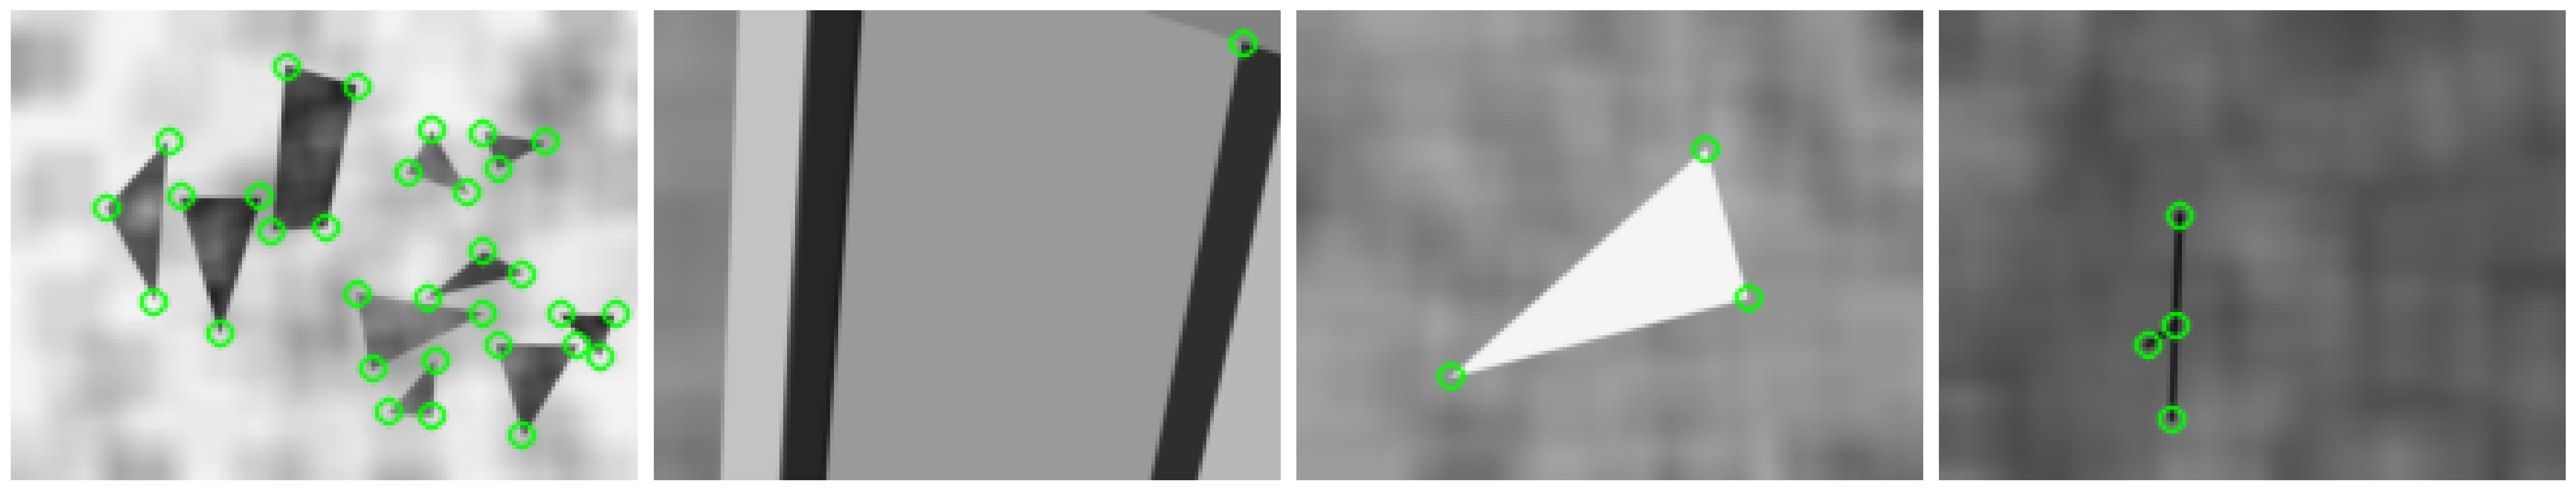

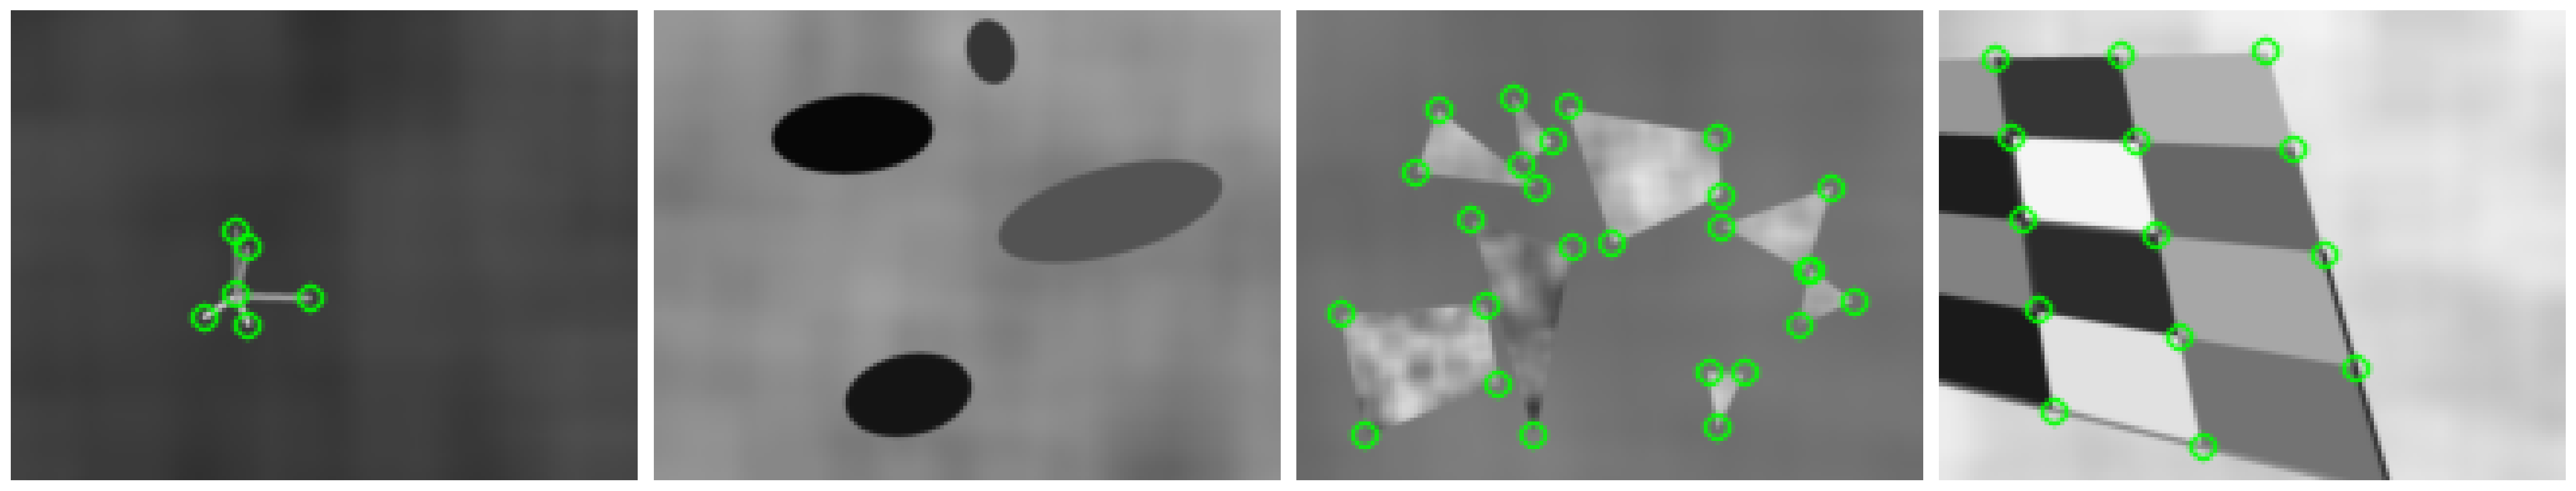

In [5]:
for i in range(8):
    plot_imgs([display(next(data))/255. for _ in range(4)], dpi=200)